<div align='center'><font size="6" color="#FC6306"> A Simple Tutorial on CNN </font></div>

## Introduction to Convolutional Neural Networks (CNN)

Convolutional Neural Networks are a powerful artificial neural network technique. These are developed for object recognition tasks such as handwritten digit recognition. Unlike traditional multilayer perceptron architectures, it uses two operations called ‘convolution’ and pooling’ to reduce an image into its essential features, and uses those features to understand and classify the image.

**Building Blocks of Convolutional Neural Networks**

There are three types of layers in a Convolutional Neural Network.
    * Convolutional Layers.
    * Pooling Layers.
    * Fully-Connected Layers.
**Convolutional Layer - ** a “filter”, sometimes called a “kernel”, is passed over the image, viewing a few pixels at a time (for example, 3X3 or 5X5). The convolution operation is a dot product of the original pixel values with weights defined in the filter. The results are summed up into one number that represents all the pixels the filter observed.





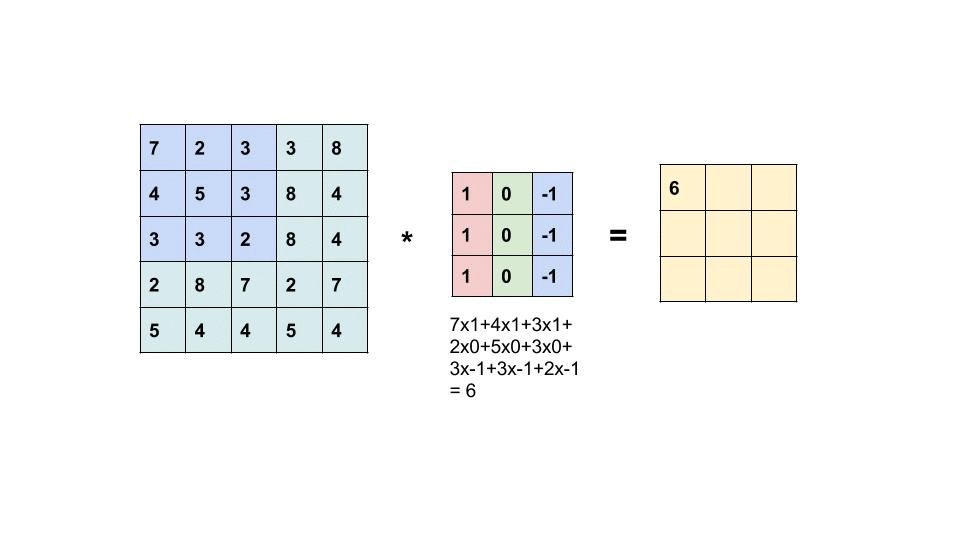

This systematic application of the same filter across an image is a powerful idea. If the filter is designed to detect a specific type of feature in the input, then the application of that filter systematically across the entire input image allows the filter an opportunity to discover that feature anywhere in the image. This capability is commonly referred to as translation invariance, e.g. the general interest in whether the feature is present rather than where it was present.

ConvNets need not be limited to only one Convolutional Layer. Conventionally, the first ConvLayer is responsible for capturing the Low-Level features such as edges, color, gradient orientation, etc. With added layers, the architecture adapts to the High-Level features as well, giving us a network which has the wholesome understanding of images in the dataset, similar to how we would.


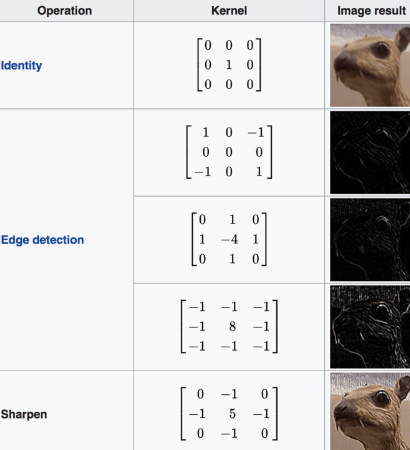

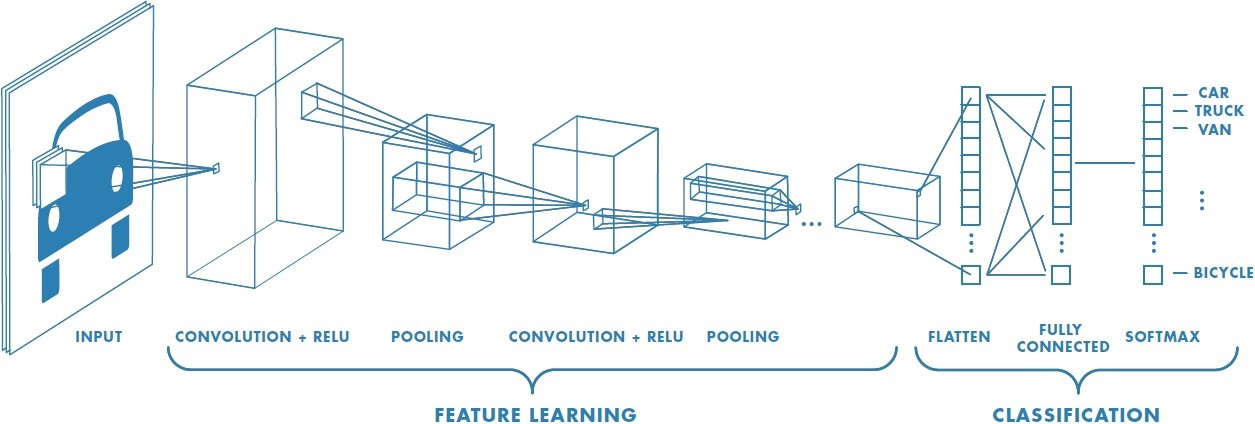


**Pooling Layers - ** A limitation of the feature map output of convolutional layers is that they record the precise position of features in the input. This means that small movements in the position of the feature in the input image will result in a different feature map. This can happen with re-cropping, rotation, shifting, and other minor changes to the input image. 

A common approach to addressing this problem from signal processing is called down sampling. This is where a lower resolution version of an input signal is created that still contains the large or important structural elements, without the fine detail that may not be as useful to the task. 

Pooling layers are used which extract some features from the feature maps and control the size of weights and biases the network is learning. Pooling mainly helps in extracting sharp and smooth features. 

The function of Pooling is to progressively reduce the spatial size of the input representation. In particular, pooling
* makes the input representations (feature dimension) smaller and more manageable
* reduces the number of parameters and computations in the network, therefore, controlling overfitting
* makes the network invariant to small transformations, distortions and translations in the input image (a small distortion in input will not change the output of Pooling – since we take the maximum / average value in a local neighborhood).
* helps us arrive at an almost scale invariant representation of our image. This is very powerful since we can detect objects in an image no matter where they are located.



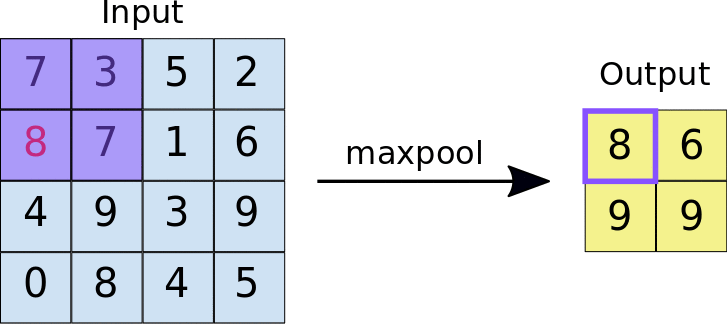

**Fully-Connected Layers - ** a traditional multilayer perceptron structure. Its input is a one-dimensional vector representing the output of the previous layers. Its output is a list of probabilities for different possible labels attached to the image (e.g. dog, cat, bird). The label that receives the highest probability is the classification decision.

The output from the convolutional and pooling layers represent high-level features of the input image. The purpose of the Fully Connected layer is to use these features for classifying the input image into various classes based on the training dataset. 

### CNN Implementation in Keras

We will do the following steps for the implementation of the CNN in Keras.
1. Introduction
2. Data Preparation
3. CNN
4. Evaluation
5. Submission

## 1. Introduction

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. The MNIST database contains 60,000 training images and 10,000 testing images.

In this kernel we will train a simple CNN and keep adding the new features like Augmentation in the future. We will run a 20 epoch CNN model on the MNIST data. Before the implementation of the CNN we do the data processing which involves 

* Normalization
* Reshape
* Label Encoding


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.datasets import mnist
import seaborn as sns
from keras.initializers import RandomNormal
from keras import backend as K
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.utils.np_utils import to_categorical 

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

## 2. Data Preparation

#### Loading Data

In [3]:
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

We will seperate out the Input columns(X) and the Output columns(Y). 

In [4]:
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1) 
X_test = test

#### Normalization
Normalizing features can mitigate the likelihood of gradients blowing up or vanishing due to the undue influence of a given feature - both of which can slow down model convergence significantly. So it is always important to normalize the data before inputting into the Network. 

In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0

#### Reshape
The data we loaded in train and test are in the .csv format, i.e., in 1D-vector reprsentation for each image in a single row with lenght 784. But to input it into a CNN, in order for CNN to learn the different features like edges, colors or shapes we need the data to be in Image format. So we convert each row (784 columns) into 28x28 matrix format for each row. (similar to 28x28 image pixels format) 

In [6]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test  = X_test.values.reshape(-1,28,28,1)

#### Label Encoding
The Output in the Y_train is in the number format as [0,1,2,3,4,5,6,7,8,9]. In order input this column for training the model we need to convert this number input into [0 and 1]'s using one-hot encoding. So below we convert the 

In [7]:
Y_train[100]  # Here the output image is 9. we need to convert it using one-hot encoding.

9

In [8]:
Y_train = to_categorical(Y_train, num_classes = 10)
Y_train[[100]]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [9]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 42000 and each image is of shape (28, 28)
Number of training examples : 28000 and each image is of shape (28, 28)


Split the data into training data and validation data for validation of accuracy purpose.

In [10]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=42)

## 3. CNN Model
We will develop a simple Convolution Neural Network model in this kernel. We use following functionalities in the below code. 

**Convolution Layer - ** As described earlier, convolution layer used to identify the important features by mapping the input image to a transfomed image using the kernel multiplier (K) by doing .dot product. So in the first convolution, we have choosen 32 filters to map the input image into a new tramnsformed image.

**Max Pooling Layer - ** As described earlier, the Maxpool layer does the  downsampling of the Input Image. This will help us to reduce computational cost, and to some extent also reduce overfitting. The advantages of using Maxpooling is already discussed in the beginning.

**Dropout - ** Dropout is mainly used for regulaization technique to avoid the overfitting of Deep Learning models. Dropout is a technique where randomly selected neurons are ignored during training based on the percentage selected in any Layer. They are “dropped-out” randomly. So dropout rate of 0.5 means 50% of the neurons in a given Layer will be dropped out during the training. This way it will avoid the overfitting of model. In this kernel we have used a drop out rate of 0.5.

**Flatten - ** Flatten is used to convert the output of convolution featured map (which can be any dimensional based on kernel size) into a 1D-vector which in turn will be fed into a Fully Connected Network. So in this step we convert all the features we found in Convolution Layer layer and Maxpool Layer into a 1D - Vector. These vectors are trained using ANN as shown below. 

In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (5,5), activation = 'relu', input_shape = (28,28,1), padding = 'same'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

#### Compile the Model

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_fit = model.fit(X_train, Y_train, batch_size = 100, epochs = 5, verbose=1, validation_data = (X_val,Y_val))

Train on 37800 samples, validate on 4200 samples
Epoch 1/5
37800/37800 [==============================] - 90s 2ms/step - loss: 0.2806 - accuracy: 0.9140 - val_loss: 0.0683 - val_accuracy: 0.9788
Epoch 2/5
37800/37800 [==============================] - 94s 2ms/step - loss: 0.1007 - accuracy: 0.9701 - val_loss: 0.0502 - val_accuracy: 0.9840
Epoch 3/5
37800/37800 [==============================] - 87s 2ms/step - loss: 0.0749 - accuracy: 0.9768 - val_loss: 0.0416 - val_accuracy: 0.9857
Epoch 4/5
37800/37800 [==============================] - 87s 2ms/step - loss: 0.0626 - accuracy: 0.9806 - val_loss: 0.0424 - val_accuracy: 0.9864
Epoch 5/5
37800/37800 [==============================] - 88s 2ms/step - loss: 0.0545 - accuracy: 0.9830 - val_loss: 0.0400 - val_accuracy: 0.9879


In the above we see that the validation accuracy is at 98.8%.

## 4. Evaluation

In [13]:
y_pred  = model.predict_classes(X_test)

In [14]:
y_pred[:5]

array([2, 0, 9, 9, 3])

## 5. Submission

In [15]:
results = pd.Series(y_pred,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("simple_cnn.csv",index=False)

This is first Deep Learning Kernel. During this learning process I found some of the below interesting articles very useful to improve my understanding better.

https://missinglink.ai/guides/convolutional-neural-networks/convolutional-neural-network-tutorial-basic-advanced/

https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/

https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53

https://medium.com/@RaghavPrabhu/understanding-of-convolutional-neural-network-cnn-deep-learning-99760835f148

https://en.wikipedia.org/wiki/Convolutional_neural_network

https://machinelearningmastery.com/pooling-layers-for-convolutional-neural-networks/

https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/


Also I found below amazing kernels which inspired me to write this kernel. I will keep adding new functionalities as keep learning new concepts and it's implementation. 

https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6#3.-CNN

https://www.kaggle.com/cdeotte/25-million-images-0-99757-mnist
